In [ ]:
mne.compu

In [13]:
mne.convert_forward_solution??

Signature:
mne.convert_forward_solution(
    fwd,
    surf_ori=False,
    force_fixed=False,
    copy=True,
    use_cps=True,
    *,
    verbose=None,
)
Docstring:
Convert forward solution between different source orientations.

Parameters
----------
fwd : Forward
    The forward solution to modify.
surf_ori : bool, optional (default False)
    Use surface-based source coordinate system? Note that force_fixed=True
    implies surf_ori=True.
force_fixed : bool, optional (default False)
    If True, force fixed source orientation mode.
copy : bool
    Whether to return a new instance or modify in place.

use_cps : bool
    Whether to use cortical patch statistics to define normal orientations for
    surfaces (default True).

verbose : bool | str | int | None
    Control verbosity of the logging output. If ``None``, use the default
    verbosity level. See the :ref:`logging documentation <tut-logging>` and
    :func:`mne.verbose` for details. Should only be passed as a keyword
    argume


.. _ex-sensitivity-maps:

Display sensitivity maps for EEG and MEG sensors

Sensitivity maps can be produced from forward operators that
indicate how well different sensor types will be able to detect
neural currents from different regions of the brain.

To get started with forward modeling see :ref:`tut-forward`.

Reading forward solution from /home/codespace/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-eeg-oct-6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (7498 sources, 306 channels, free orientations)
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (7498 sources, 60 channels, free orientati

<Axes: xlabel='lead', ylabel='dist'>

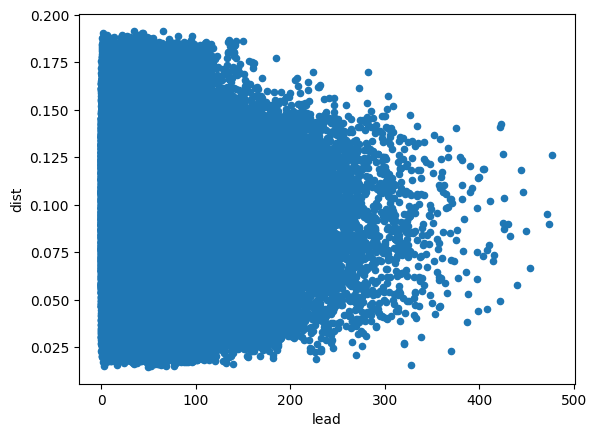

In [23]:
# %load forward_sensitivity_maps.py
"""
.. _ex-sensitivity-maps:

================================================
Display sensitivity maps for EEG and MEG sensors
================================================

Sensitivity maps can be produced from forward operators that
indicate how well different sensor types will be able to detect
neural currents from different regions of the brain.

To get started with forward modeling see :ref:`tut-forward`.
"""

# Author: Eric Larson <larson.eric.d@gmail.com>
#
# License: BSD-3-Clause
# Copyright the MNE-Python contributors.

# %%


import pandas as pd


import matplotlib.pyplot as plt
import numpy as np

import mne
from mne.datasets import sample
from mne.source_estimate import SourceEstimate
from mne.source_space import compute_distance_to_sensors

print(__doc__)

data_path = sample.data_path()
meg_path = data_path / "MEG" / "sample"
fwd_fname = meg_path / "sample_audvis-meg-eeg-oct-6-fwd.fif"
subjects_dir = data_path / "subjects"

# Read the forward solutions with surface orientation
fwd = mne.read_forward_solution(fwd_fname, ordered=True)
#mne.convert_forward_solution(fwd, surf_ori=True, copy=False)
#mne.convert_forward_solution(fwd, surf_ori=False, copy=False)
leadfield = fwd["sol"]["data"]
print("Leadfield size : %d x %d" % leadfield.shape)

# Compare sensitivity map with distribution of source depths

# source space with vertices
src = fwd["src"]


# %%
# Compute sensitivity maps

grad_map = mne.sensitivity_map(fwd, ch_type="grad", mode="fixed")
mag_map = mne.sensitivity_map(fwd, ch_type="mag", mode="fixed")
eeg_map = mne.sensitivity_map(fwd, ch_type="eeg", mode="fixed")

picks_meg = mne.pick_types(fwd["info"], meg=True, eeg=False)
picks_eeg = mne.pick_types(fwd["info"], meg=False, eeg=True)

meg_depths = compute_distance_to_sensors(src=src, info=fwd["info"], picks=picks_meg)
eeg_depths = compute_distance_to_sensors(src=src, info=fwd["info"], picks=picks_eeg)


eeg_origsol_a = fwd['_orig_sol'][picks_eeg, 0 : 7498*1]
eeg_origsol_b = fwd['_orig_sol'][picks_eeg, 7498*1 : 7498*2]
eeg_origsol_c = fwd['_orig_sol'][picks_eeg, 7498*2 : 7498*3]

eeg_leadfield_a = leadfield[picks_eeg, 0 : 7498*1]
eeg_leadfield_b = leadfield[picks_eeg, 7498*1 : 7498*2]
eeg_leadfield_c = leadfield[picks_eeg, 7498*2 : 7498*3]

meg_leadfield_a = leadfield[picks_meg, 0 : 7498*1]
meg_leadfield_b = leadfield[picks_meg, 7498*1 : 7498*2]
meg_leadfield_c = leadfield[picks_meg, 7498*2 : 7498*3]

df = pd.DataFrame(np.array([eeg_depths.ravel(), eeg_leadfield_c.ravel()]).T, columns=['dist', 'lead'])
fig, ax = plt.subplots()
df.abs().plot(kind='scatter', x='lead', y='dist', ax=ax)

<Axes: xlabel='lead', ylabel='dist2'>

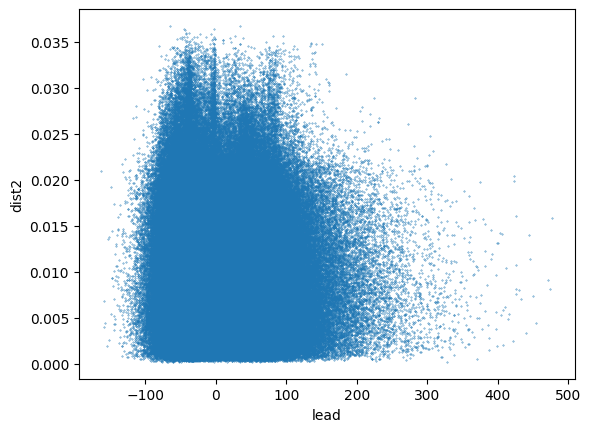

In [34]:
fig, ax = plt.subplots()
df.plot(kind='scatter', x='lead', y='dist2', ax=ax, s=0.1)

In [24]:
df['dist2'] = df.dist**2

In [25]:
df.corr()

,dist,lead,dist2
dist,1.000000,-0.050797,0.981772
lead,-0.050797,1.000000,-0.055019
dist2,0.981772,-0.055019,1.000000


In [26]:
df[df.lead>0].corr()

,dist,lead,dist2
dist,1.000000,-0.035719,0.982095
lead,-0.035719,1.000000,-0.038165
dist2,0.982095,-0.038165,1.000000


In [27]:
df[df.lead<0].corr()

,dist,lead,dist2
dist,1.000000,0.008545,0.981632
lead,0.008545,1.000000,0.013919
dist2,0.981632,0.013919,1.000000


In [33]:
df[df.lead>300].corr()

,dist,lead,dist2
dist,1.000000,-0.006391,0.983302
lead,-0.006391,1.000000,-0.018403
dist2,0.983302,-0.018403,1.000000


In [400]:
df = pd.DataFrame(np.array([eeg_depths.ravel(), eeg_leadfield_a.ravel()]).T, columns=['dist', 'lead'])
#fig, ax = plt.subplots()
#df.abs().plot(kind='scatter', x='lead', y='dist', ax=ax)

<Axes: xlabel='dist', ylabel='lead'>

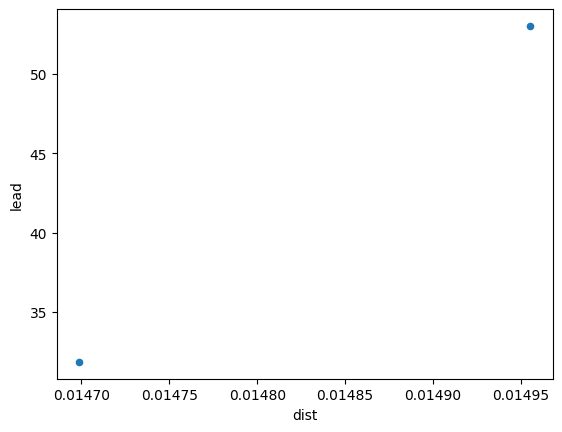

In [414]:
df[df.dist<0.015].abs().plot(kind='scatter', x='dist', y='lead')

In [401]:
df

,dist,lead
0,0.156577,-19.512361
1,0.159791,10.755154
2,0.160976,-33.557861
3,0.138719,29.885336
4,0.136969,-30.148142
...,...,...
442377,0.149832,-38.345204
442378,0.167923,18.674499
442379,0.163512,43.001260
442380,0.157253,11.459631


In [359]:
leadfield.shape

(366, 22494)

<Axes: xlabel='lf', ylabel='dep'>

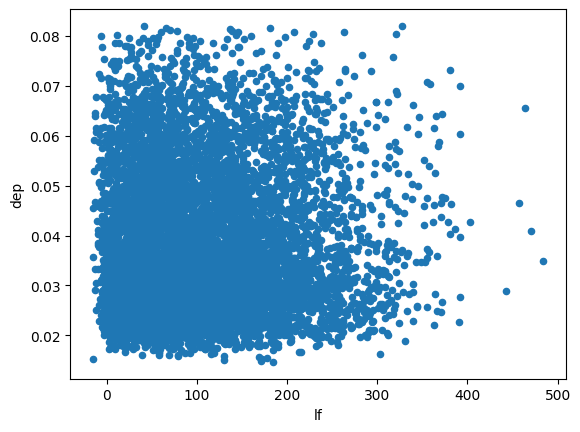

In [378]:
df = pd.DataFrame([leadfield[picks_eeg,:].max(axis=0),
                   eeg_depths.min(axis=1)],
                   index=['lf', 'dep']).T
df.plot(kind='scatter', x='lf', y='dep')

<Axes: xlabel='lf', ylabel='dep'>

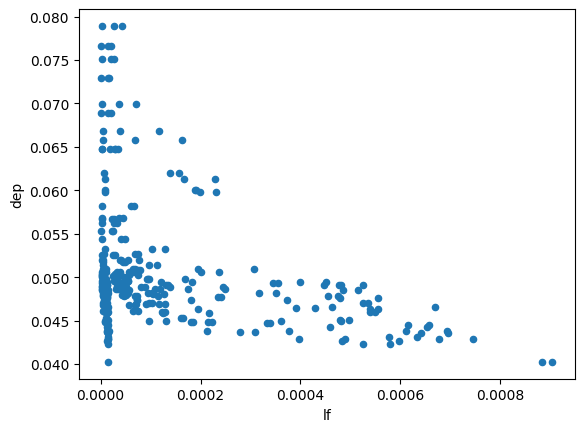

In [399]:
df = pd.DataFrame([meg_leadfield_c.max(axis=1),
                   meg_depths.min(axis=0)],
                   index=['lf', 'dep']).T
df.plot(kind='scatter', x='lf', y='dep')

<Axes: xlabel='lf', ylabel='dep'>

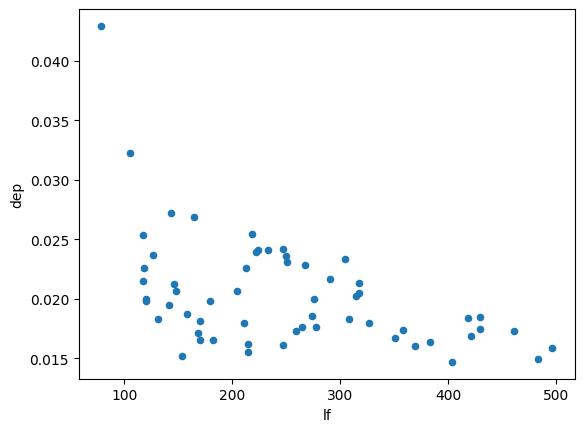

In [387]:
df = pd.DataFrame([eeg_leadfield_b.max(axis=1),
                   eeg_depths.min(axis=0)],
                   index=['lf', 'dep']).T
df.plot(kind='scatter', x='lf', y='dep')

<Axes: xlabel='lf', ylabel='dep'>

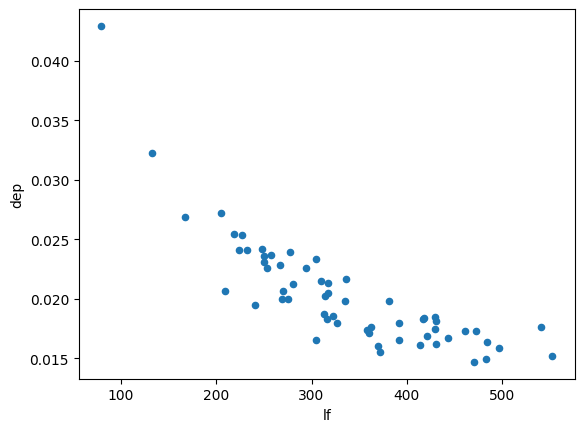

In [377]:
df = pd.DataFrame([leadfield[picks_eeg,:].max(axis=1),
                   eeg_depths.min(axis=0)],
                   index=['lf', 'dep']).T
df.plot(kind='scatter', x='lf', y='dep')

In [372]:
eeg_depths.min(axis=0).shape

(59,)

In [348]:
meeg_depths.shape

(7498, 366)

In [350]:
leadfield.shape

(366, 22494)

In [352]:
leadfield.shape

(366, 22494)

<Axes: xlabel='lead', ylabel='dist'>

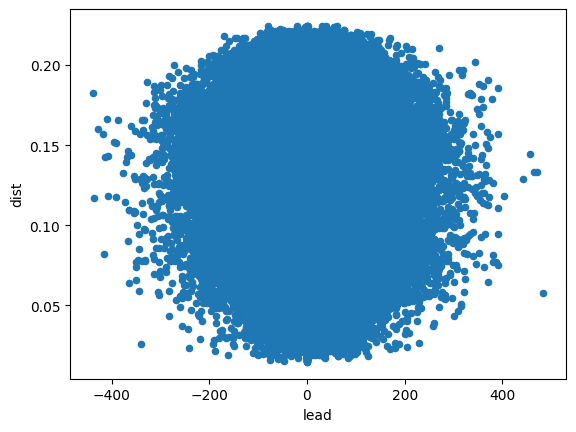

In [355]:
meeg_depths = compute_distance_to_sensors(src=src, info=fwd["info"])
df = pd.DataFrame(np.array([meeg_depths.ravel(), leadfield[:,:7498].ravel()]).T, columns=['dist', 'lead'])

fig, ax = plt.subplots()
df.plot(kind='scatter', x='lead', y='dist', ax=ax)

In [ ]:
df = pd.DataFrame(np.array([eeg_depths.ravel(), eeg_leadfield_a.ravel()]).T, columns=['dist', 'lead'])


In [296]:
fwd['sol']['data'].shape

(366, 22494)

In [295]:
fwd['_orig_sol'].shape

(366, 22494)

In [284]:
picks_eeg

array([306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
       319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331,
       332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344,
       345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357,
       359, 360, 361, 362, 363, 364, 365])

In [298]:
fwd['_orig_sol']

array([[-9.2140141e-07, -1.5742788e-05, -1.8360626e-05, ...,
        -1.7713162e-06, -4.0935074e-06,  1.3305913e-05],
       [-1.7126629e-05,  1.3674469e-05,  1.1649629e-05, ...,
        -1.3110689e-05,  6.1016372e-06,  8.7605977e-06],
       [-7.1391241e-07,  9.5892676e-07,  7.8583281e-07, ...,
         9.4759559e-07, -2.4599572e-07, -6.7779990e-07],
       ...,
       [ 6.0839844e+00, -1.5468268e+02,  5.0632715e+00, ...,
        -8.1903887e+00, -4.9190998e+01,  4.9289772e+01],
       [ 6.0488628e+01, -1.0058988e+02,  2.2395798e+01, ...,
        -3.9272308e+00, -5.2710575e+01,  5.1758686e+01],
       [-2.7931702e+00, -6.1165756e+01, -1.7378506e+01, ...,
        -4.6161895e+00, -4.0158859e+01,  3.5853813e+01]], dtype=float32)

In [272]:
compute_distance_to_sensors??

Signature:
compute_distance_to_sensors(
    src,
    info,
    picks=None,
    trans=None,
    verbose=None,
)
Docstring:
Compute distances between vertices and sensors.

Parameters
----------
src : instance of SourceSpaces
    The object with vertex positions for which to compute distances to
    sensors.

info : mne.Info | None
    The :class:`mne.Info` object with information about the sensors and methods of measurement. Must contain sensor positions to which distances shall
    be computed.
picks : str | array-like | slice | None
    Channels to include. Slices and lists of integers will be interpreted as 
    channel indices. In lists, channel *type* strings (e.g., ``['meg', 
    'eeg']``) will pick channels of those types, channel *name* strings (e.g., 
    ``['MEG0111', 'MEG2623']`` will pick the given channels. Can also be the 
    string values "all" to pick all channels, or "data" to pick :term:`data 
    channels`. None (default) will pick good data channels. Note that chann

In [241]:
grad_map.shape

(7498, 1)

In [178]:
#eeg_chan_idxs = np.array([i_it for i_it,i in enumerate(fwd.ch_names) if 'EEG' in i])
#eeg_chan_idxs

In [182]:
picks_eeg.shape

(59,)

In [232]:
meg_depths = compute_distance_to_sensors(src=src, info=fwd["info"], picks=picks_meg)
meg_depths.shape

(7498, 305)

In [181]:
meg_depths = compute_distance_to_sensors(src=src, info=fwd["info"], picks=picks_meg)
eeg_depths = compute_distance_to_sensors(src=src, info=fwd["info"], picks=picks_eeg)
eeg_depths.shape

(7498, 59)

In [187]:
leadfield[picks,:]

(59, 22494)

In [ ]:
eeg_origsol_a = fwd['_orig_sol'][picks_eeg, 0 : 7498*1]
eeg_origsol_b = fwd['_orig_sol'][picks_eeg, 7498*1 : 7498*2]
eeg_origsol_c = fwd['_orig_sol'][picks_eeg, 7498*2 : 7498*3]

eeg_leadfield_a = leadfield[picks_eeg, 0 : 7498*1]
eeg_leadfield_b = leadfield[picks_eeg, 7498*1 : 7498*2]
eeg_leadfield_c = leadfield[picks_eeg, 7498*2 : 7498*3]

meg_leadfield_a = leadfield[picks_meg, 0 : 7498*1]
meg_leadfield_b = leadfield[picks_meg, 7498*1 : 7498*2]
meg_leadfield_c = leadfield[picks_meg, 7498*2 : 7498*3]

df = pd.DataFrame(np.array([eeg_depths.ravel(), eeg_origsol_b.ravel()]).T, columns=['dist', 'lead'])
fig, ax = plt.subplots()
df.abs().plot(kind='scatter', x='lead', y='dist', ax=ax)

<Axes: xlabel='lead', ylabel='dist'>

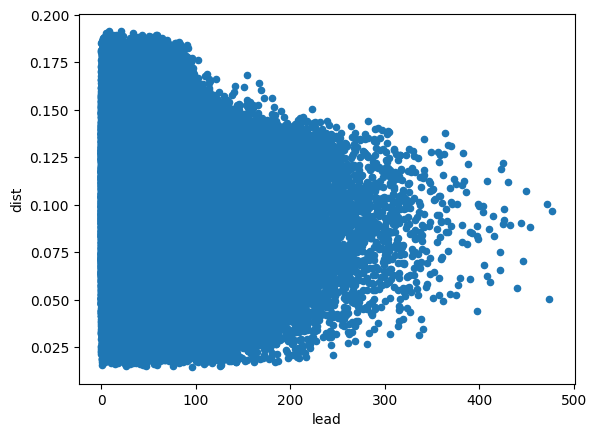

In [309]:
df = pd.DataFrame(np.array([eeg_depths.ravel(), eeg_origsol_c.T.ravel()]).T, columns=['dist', 'lead'])
fig, ax = plt.subplots()
df.abs().plot(kind='scatter', x='lead', y='dist', ax=ax)

<Axes: xlabel='lead', ylabel='dist'>

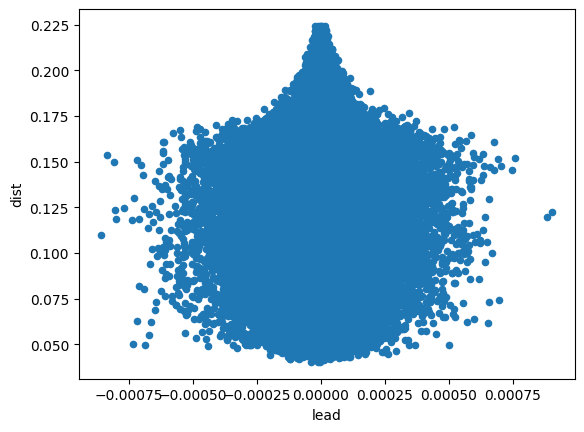

In [244]:
df = pd.DataFrame(np.array([meg_depths.ravel(), meg_leadfield_c.T.ravel()]).T, columns=['dist', 'lead'])
fig, ax = plt.subplots()
df.plot(kind='scatter', x='lead', y='dist', ax=ax)

<Axes: xlabel='lead', ylabel='dist'>

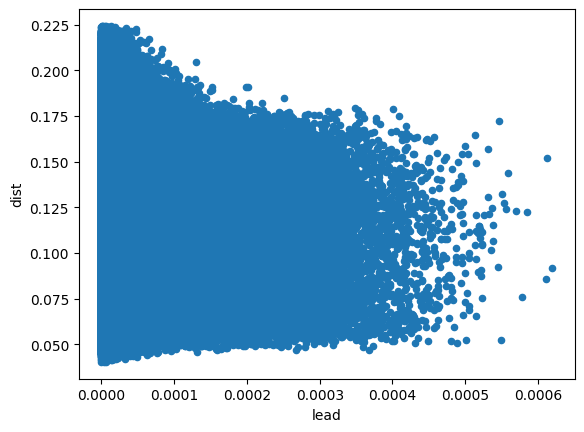

In [235]:
df = pd.DataFrame(np.array([meg_depths.ravel(), meg_leadfield_a.T.ravel()]).T, columns=['dist', 'lead'])
fig, ax = plt.subplots()
df.abs().plot(kind='scatter', x='lead', y='dist', ax=ax)

<Axes: xlabel='lead', ylabel='dist'>

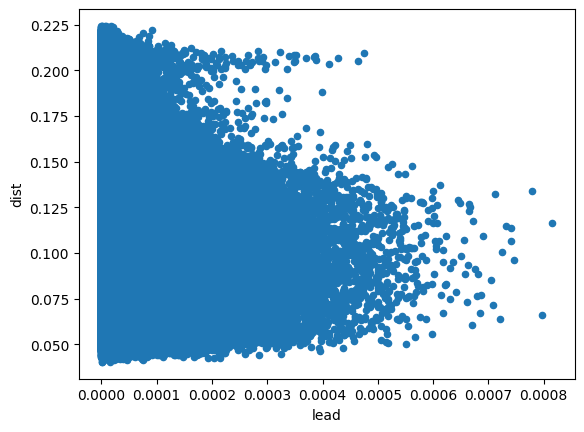

In [236]:
df = pd.DataFrame(np.array([meg_depths.ravel(), meg_leadfield_b.T.ravel()]).T, columns=['dist', 'lead'])
fig, ax = plt.subplots()
df.abs().plot(kind='scatter', x='lead', y='dist', ax=ax)

<Axes: xlabel='lead', ylabel='dist'>

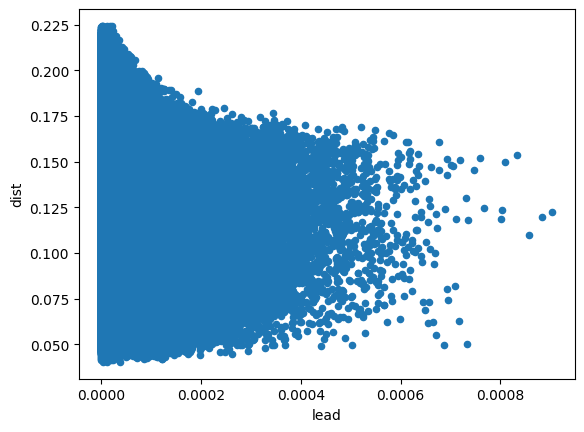

In [238]:
df = pd.DataFrame(np.array([meg_depths.ravel(), meg_leadfield_c.T.ravel()]).T, columns=['dist', 'lead'])
fig, ax = plt.subplots()
df.abs().plot(kind='scatter', x='lead', y='dist', ax=ax)

In [240]:
df.corr()

,dist,lead
dist,1.000000,0.001631
lead,0.001631,1.000000


<Axes: xlabel='lead', ylabel='dist'>

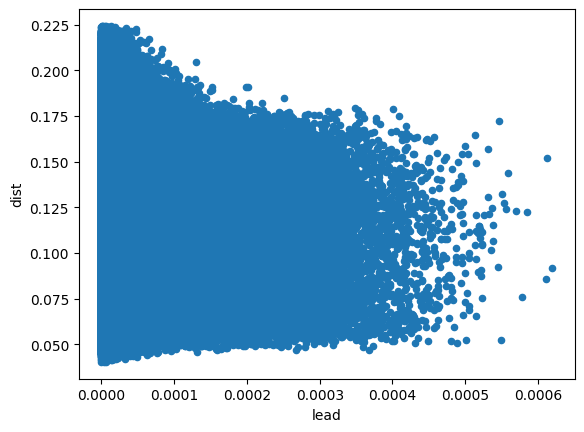

In [230]:
df = pd.DataFrame(np.array([meg_depths.ravel(), meg_leadfield_a.T.ravel()]).T, columns=['dist', 'lead'])
fig, ax = plt.subplots()
df.abs().plot(kind='scatter', x='lead', y='dist', ax=ax)

In [205]:
eeg_leadfield.shape

(59, 7498)

In [207]:
import pandas as pd

In [218]:
df = pd.DataFrame(np.array([eeg_depths.ravel(), eeg_leadfield.T.ravel()]).T, columns=['dist', 'lead'])

<Axes: xlabel='lead', ylabel='dist'>

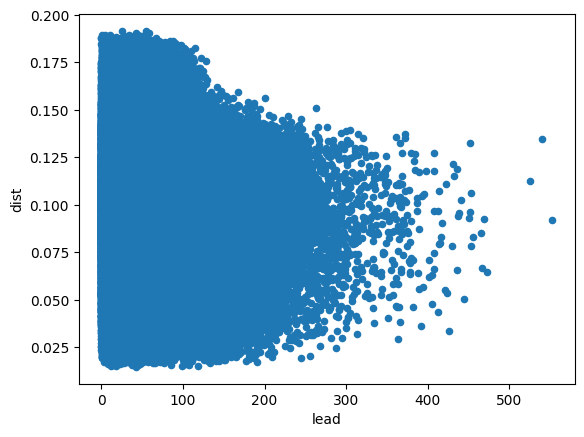

In [228]:
df = pd.DataFrame(np.array([eeg_depths.ravel(), eeg_leadfield_c.T.ravel()]).T, columns=['dist', 'lead'])
fig, ax = plt.subplots()
df.abs().plot(kind='scatter', x='lead', y='dist', ax=ax)

<Axes: xlabel='lead', ylabel='dist'>

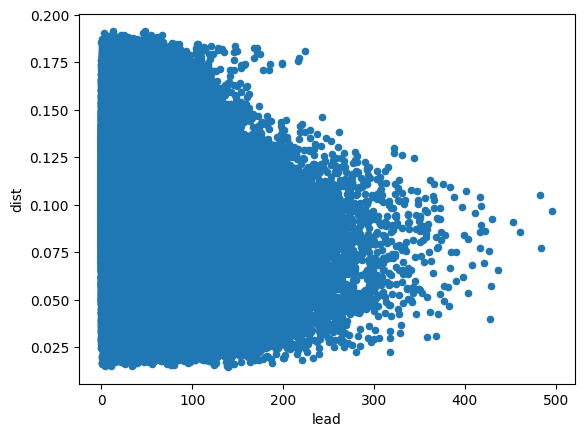

In [227]:
df = pd.DataFrame(np.array([eeg_depths.ravel(), eeg_leadfield_b.T.ravel()]).T, columns=['dist', 'lead'])
fig, ax = plt.subplots()
df.abs().plot(kind='scatter', x='lead', y='dist', ax=ax)

In [257]:
eeg_depths.shape

(7498, 59)

In [259]:
eeg_leadfield_a.T.shape

(7498, 59)

<Axes: xlabel='lead', ylabel='dist'>

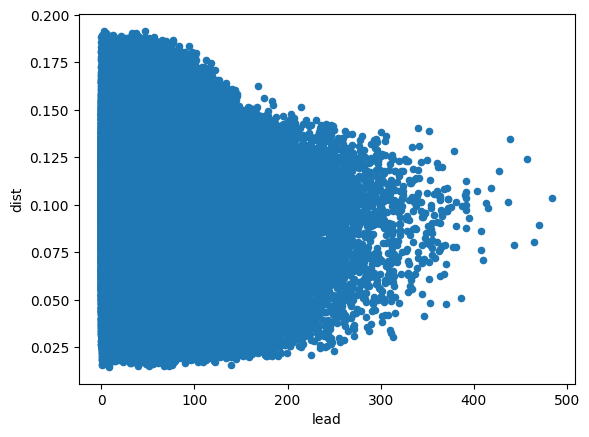

In [226]:
df = pd.DataFrame(np.array([eeg_depths.ravel(), eeg_leadfield_a.T.ravel()]).T, columns=['dist', 'lead'])
fig, ax = plt.subplots()
df.abs().plot(kind='scatter', x='lead', y='dist', ax=ax)

In [268]:
eeg_depths

array([[0.15657689, 0.15979139, 0.16097584, ..., 0.03599566, 0.04658199,
        0.06554836],
       [0.14994716, 0.15355917, 0.15564024, ..., 0.04788745, 0.05745725,
        0.07801372],
       [0.15825533, 0.16237929, 0.16443705, ..., 0.03321615, 0.04834201,
        0.06048653],
       ...,
       [0.1064686 , 0.09193703, 0.07370544, ..., 0.14094268, 0.12888053,
        0.15246067],
       [0.09335077, 0.08764479, 0.08087263, ..., 0.12957746, 0.1256419 ,
        0.13079389],
       [0.07299276, 0.05740187, 0.0404649 , ..., 0.16351186, 0.15725329,
        0.17102132]])

In [267]:
df = pd.DataFrame(np.array([eeg_depths.ravel(), eeg_leadfield_a.ravel()])].T, columns=['dist', 'lead'])
fig, ax = plt.subplots()
df.abs().plot(kind='scatter', x='lead', y='dist', ax=ax)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (3497769595.py, line 1)

<Axes: xlabel='lead', ylabel='dist'>

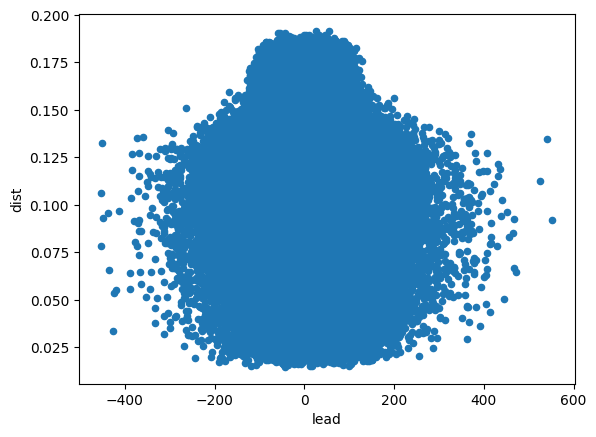

In [222]:
fig, ax = plt.subplots()
df.plot(kind='scatter', x='lead', y='dist', ax=ax)

In [223]:
df.abs().plot(kind='scatter', x='lead', y='dist', ax=ax)

<Axes: xlabel='lead', ylabel='dist'>

In [213]:
df = pd.DataFrame(eeg_depths.ravel(), eeg_leadfield.T.ravel()))#, columns=['dist', 'lf']).T

SyntaxError: unmatched ')' (3903861196.py, line 1)

In [188]:
7498*3

22494

In [251]:
# Compute minimum Euclidean distances between vertices and MEG sensors
eeg_depths = compute_distance_to_sensors(src=src, info=fwd["info"], picks=picks_eeg)
maxdep = eeg_depths.max()  # for scaling
vertices = [src[0]["vertno"], src[1]["vertno"]]
eeg_depths_map = SourceEstimate(data=eeg_depths, vertices=vertices, tmin=0.0, tstep=1.0)

In [255]:
eeg_depths.shape

(7498, 59)

In [253]:
eeg_depths_map

<SourceEstimate | 7498 vertices, tmin : 0.0 (ms), tmax : 58000.0 (ms), tstep : 1000.0 (ms), data shape : (7498, 59), ~3.4 MB>

In [250]:
vertices[0].shape

(3732,)

In [246]:
src[0]['rr'].shape

(155407, 3)

In [170]:
fwd['sol']

{'nrow': 366,
 'ncol': 22494,
 'row_names': ['MEG 0113',
  'MEG 0112',
  'MEG 0111',
  'MEG 0122',
  'MEG 0123',
  'MEG 0121',
  'MEG 0132',
  'MEG 0133',
  'MEG 0131',
  'MEG 0143',
  'MEG 0142',
  'MEG 0141',
  'MEG 0213',
  'MEG 0212',
  'MEG 0211',
  'MEG 0222',
  'MEG 0223',
  'MEG 0221',
  'MEG 0232',
  'MEG 0233',
  'MEG 0231',
  'MEG 0243',
  'MEG 0242',
  'MEG 0241',
  'MEG 0313',
  'MEG 0312',
  'MEG 0311',
  'MEG 0322',
  'MEG 0323',
  'MEG 0321',
  'MEG 0333',
  'MEG 0332',
  'MEG 0331',
  'MEG 0343',
  'MEG 0342',
  'MEG 0341',
  'MEG 0413',
  'MEG 0412',
  'MEG 0411',
  'MEG 0422',
  'MEG 0423',
  'MEG 0421',
  'MEG 0432',
  'MEG 0433',
  'MEG 0431',
  'MEG 0443',
  'MEG 0442',
  'MEG 0441',
  'MEG 0513',
  'MEG 0512',
  'MEG 0511',
  'MEG 0523',
  'MEG 0522',
  'MEG 0521',
  'MEG 0532',
  'MEG 0533',
  'MEG 0531',
  'MEG 0542',
  'MEG 0543',
  'MEG 0541',
  'MEG 0613',
  'MEG 0612',
  'MEG 0611',
  'MEG 0622',
  'MEG 0623',
  'MEG 0621',
  'MEG 0633',
  'MEG 0632',
  'ME

In [168]:
eeg_depths_map.shape

(7498, 305)

In [169]:
eeg_depths.shape

(7498, 59)

In [164]:
fwd.shape

AttributeError: 'Forward' object has no attribute 'shape'

In [141]:
fwd['source_rr']

array([[-0.01604265, -0.04790326,  0.09510136],
       [-0.02085803, -0.04012932,  0.10417885],
       [-0.02141999, -0.05089982,  0.08986362],
       ...,
       [ 0.05165713,  0.04738813,  0.07676858],
       [ 0.01779249,  0.03926942,  0.03782711],
       [ 0.02839238,  0.07766301,  0.05856433]])

In [157]:
import seaborn as sns

<Axes: >

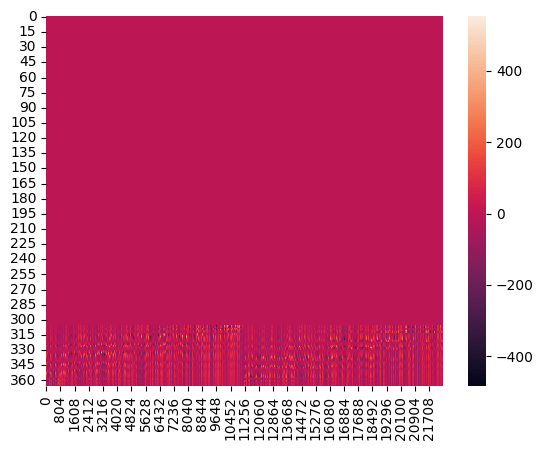

In [158]:
sns.heatmap((fwd['sol']['data']))

In [120]:
grad_map.shape

(7498, 1)

In [130]:
fwd["sol"]['col_names']

[]

In [71]:
leadfield.shape

(366, 22494)

In [125]:
leadfield.shape          fwd["sol"]['col_names']

(366, 22494)

In [133]:
len(fwd["sol"]['row_names'])

366

In [134]:
len(fwd["sol"]['col_names'])

0

In [136]:
fwd['sol']

{'nrow': 366,
 'ncol': 22494,
 'row_names': ['MEG 0113',
  'MEG 0112',
  'MEG 0111',
  'MEG 0122',
  'MEG 0123',
  'MEG 0121',
  'MEG 0132',
  'MEG 0133',
  'MEG 0131',
  'MEG 0143',
  'MEG 0142',
  'MEG 0141',
  'MEG 0213',
  'MEG 0212',
  'MEG 0211',
  'MEG 0222',
  'MEG 0223',
  'MEG 0221',
  'MEG 0232',
  'MEG 0233',
  'MEG 0231',
  'MEG 0243',
  'MEG 0242',
  'MEG 0241',
  'MEG 0313',
  'MEG 0312',
  'MEG 0311',
  'MEG 0322',
  'MEG 0323',
  'MEG 0321',
  'MEG 0333',
  'MEG 0332',
  'MEG 0331',
  'MEG 0343',
  'MEG 0342',
  'MEG 0341',
  'MEG 0413',
  'MEG 0412',
  'MEG 0411',
  'MEG 0422',
  'MEG 0423',
  'MEG 0421',
  'MEG 0432',
  'MEG 0433',
  'MEG 0431',
  'MEG 0443',
  'MEG 0442',
  'MEG 0441',
  'MEG 0513',
  'MEG 0512',
  'MEG 0511',
  'MEG 0523',
  'MEG 0522',
  'MEG 0521',
  'MEG 0532',
  'MEG 0533',
  'MEG 0531',
  'MEG 0542',
  'MEG 0543',
  'MEG 0541',
  'MEG 0613',
  'MEG 0612',
  'MEG 0611',
  'MEG 0622',
  'MEG 0623',
  'MEG 0621',
  'MEG 0633',
  'MEG 0632',
  'ME

In [124]:
eeg_map.shape[0] + mag_map.shape[0] + grad_map.shape[0]

22494

In [126]:
assert leadfield.shape[1] == eeg_map.shape[0] + mag_map.shape[0] + grad_map.shape[0]

<Axes: >

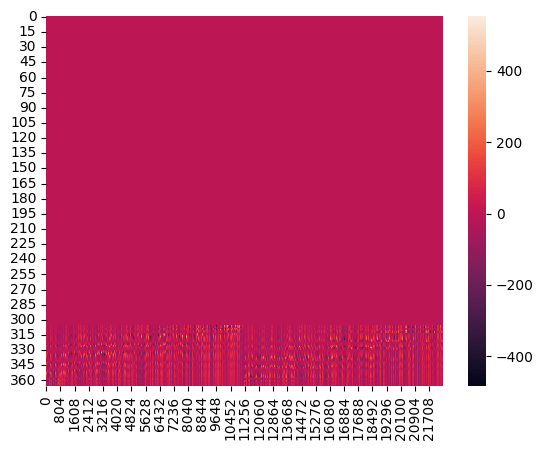

In [162]:
sns.heatmap(leadfield)

In [330]:
_df = pd.DataFrame([leadfield[picks_eeg,:500].ravel(), eeg_depths[:500,:].ravel()], index=['lf', 'ed']).T

<Axes: xlabel='ed', ylabel='lf'>

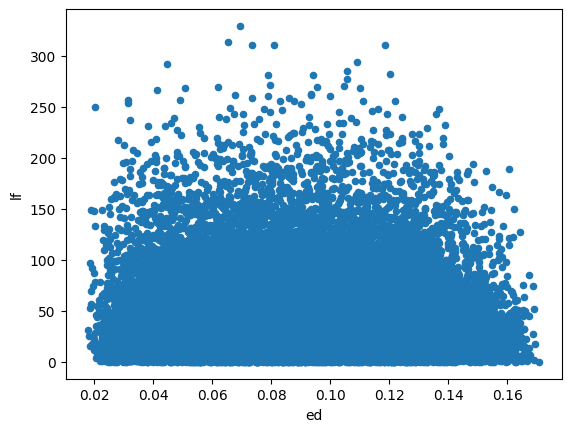

In [335]:
_df.abs().plot(kind='scatter', x='ed', y='lf')

In [323]:
eeg_depths[:500,:]


array([[0.15657689, 0.15979139, 0.16097584, ..., 0.03599566, 0.04658199,
        0.06554836],
       [0.14994716, 0.15355917, 0.15564024, ..., 0.04788745, 0.05745725,
        0.07801372],
       [0.15825533, 0.16237929, 0.16443705, ..., 0.03321615, 0.04834201,
        0.06048653],
       ...,
       [0.11611116, 0.11694025, 0.11781929, ..., 0.08675176, 0.08760222,
        0.11285903],
       [0.11368255, 0.11993543, 0.12689193, ..., 0.09113616, 0.0999651 ,
        0.11580108],
       [0.1147292 , 0.12287427, 0.13178205, ..., 0.09395032, 0.10529708,
        0.11752545]])

[Text(0.5, 1.0, 'Normal orientation sensitivity'),
 Text(0.5, 0, 'sensitivity'),
 Text(0, 0.5, 'count')]

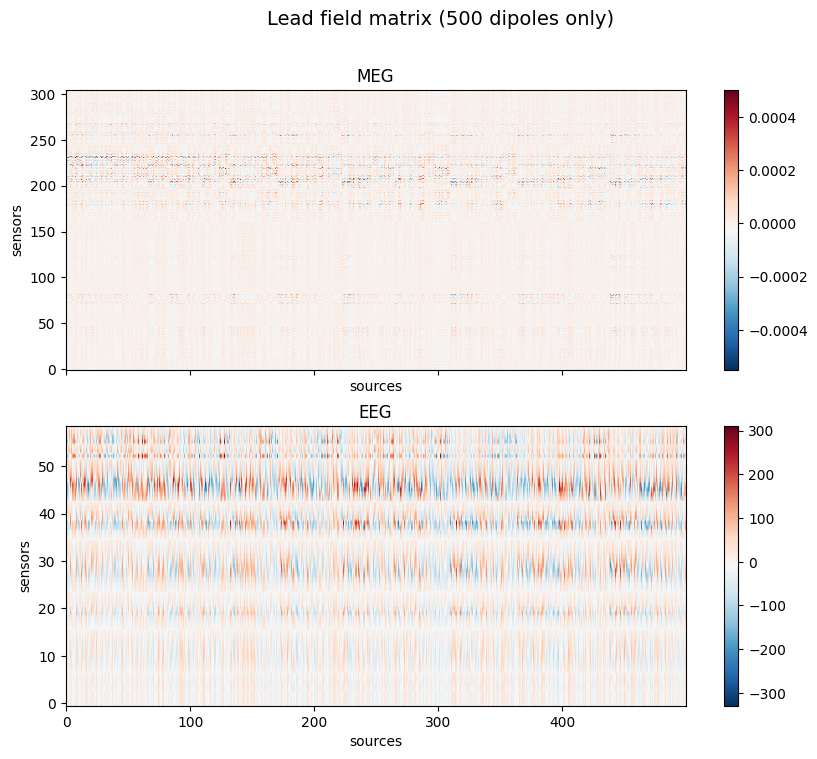

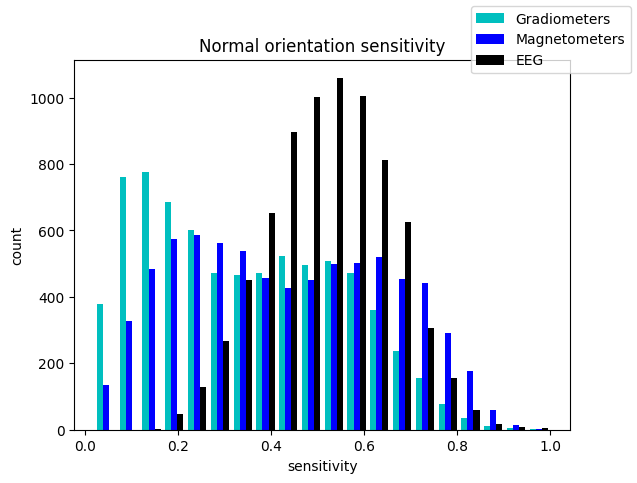

In [73]:
# %%
# Show gain matrix a.k.a. leadfield matrix with sensitivity map

picks_meg = mne.pick_types(fwd["info"], meg=True, eeg=False)
picks_eeg = mne.pick_types(fwd["info"], meg=False, eeg=True)

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
fig.suptitle("Lead field matrix (500 dipoles only)", fontsize=14)
for ax, picks, ch_type in zip(axes, [picks_meg, picks_eeg], ["meg", "eeg"]):
    im = ax.imshow(leadfield[picks, :500], origin="lower", aspect="auto", cmap="RdBu_r")
    ax.set_title(ch_type.upper())
    ax.set_xlabel("sources")
    ax.set_ylabel("sensors")

    fig.colorbar(im, ax=ax)

fig_2, ax = plt.subplots()
ax.hist(
    [grad_map.data.ravel(), mag_map.data.ravel(), eeg_map.data.ravel()],
    bins=20,
    label=["Gradiometers", "Magnetometers", "EEG"],
    color=["c", "b", "k"],
)
fig_2.legend()
ax.set(title="Normal orientation sensitivity", xlabel="sensitivity", ylabel="count")

In [75]:
leadfield.shape

(366, 22494)

In [59]:
fwd.keys()

dict_keys(['source_ori', 'coord_frame', 'nsource', 'nchan', 'sol', '_orig_sol', 'sol_grad', 'mri_head_t', 'info', 'src', 'source_rr', '_orig_source_ori', 'source_nn', 'surf_ori'])

In [38]:
leadfield.shape

(366, 22494)

In [22]:
# sphinx_gallery_thumbnail_number = 3
brain_sens = grad_map.plot(
    subjects_dir=subjects_dir, clim=dict(lims=[0, 50, 100]), figure=1
)
brain_sens.add_text(0.1, 0.9, "Gradiometer sensitivity", "title", font_size=16)

# %%

RuntimeError: Could not load any valid 3D backend
pyvistaqt: No Qt bindings could be found
notebook: No module named 'ipyevents'

 install pyvistaqt, using pip or conda:
'pip install pyvistaqt'
'conda install -c conda-forge pyvistaqt'

 or install ipywidgets, if using a notebook backend
'pip install ipywidgets'
'conda install -c conda-forge ipywidgets'

In [28]:
# Compare sensitivity map with distribution of source depths

# source space with vertices
src = fwd["src"]

In [118]:
src[1]['vertno'].shape

(3766,)

In [29]:
# Compute minimum Euclidean distances between vertices and MEG sensors
depths = compute_distance_to_sensors(src=src, info=fwd["info"], picks=picks_meg).min(
    axis=1
)
maxdep = depths.max()  # for scaling

vertices = [src[0]["vertno"], src[1]["vertno"]]

depths_map = SourceEstimate(data=depths, vertices=vertices, tmin=0.0, tstep=1.0)

In [41]:
eeg_depths = compute_distance_to_sensors(src=src, info=fwd["info"], picks=picks_eeg)
eeg_depths


array([[0.15657689, 0.15979139, 0.16097584, ..., 0.03599566, 0.04658199,
        0.06554836],
       [0.14994716, 0.15355917, 0.15564024, ..., 0.04788745, 0.05745725,
        0.07801372],
       [0.15825533, 0.16237929, 0.16443705, ..., 0.03321615, 0.04834201,
        0.06048653],
       ...,
       [0.1064686 , 0.09193703, 0.07370544, ..., 0.14094268, 0.12888053,
        0.15246067],
       [0.09335077, 0.08764479, 0.08087263, ..., 0.12957746, 0.1256419 ,
        0.13079389],
       [0.07299276, 0.05740187, 0.0404649 , ..., 0.16351186, 0.15725329,
        0.17102132]])

In [51]:
vertices[0].shape

(3732,)

In [54]:
vertices[0].shape

(3732,)

In [53]:
vertices[0]

array([   841,   1170,   1329, ..., 155249, 155323, 155330])

In [48]:
leadfield[picks_eeg,:].shape

(59, 22494)

In [46]:
eeg_depths.shape

(7498, 59)

In [45]:
leadfield.shape

(366, 22494)

In [43]:
meg_depths

array([[0.16160805, 0.16160805, 0.16160805, ..., 0.12299917, 0.12299917,
        0.12299917],
       [0.16189942, 0.16189942, 0.16189942, ..., 0.13003371, 0.13003371,
        0.13003371],
       [0.1566035 , 0.1566035 , 0.1566035 , ..., 0.12691583, 0.12691583,
        0.12691583],
       ...,
       [0.18332286, 0.18332286, 0.18332286, ..., 0.09675721, 0.09675721,
        0.09675721],
       [0.13500418, 0.13500418, 0.13500418, ..., 0.11121401, 0.11121401,
        0.11121401],
       [0.16070932, 0.16070932, 0.16070932, ..., 0.13242261, 0.13242261,
        0.13242261]])

In [42]:
eeg_depths.shape

(7498, 59)

In [33]:
meg_depths = compute_distance_to_sensors(src=src, info=fwd["info"], picks=picks_meg)
meg_depths

meg_depths

array([[0.16160805, 0.16160805, 0.16160805, ..., 0.12299917, 0.12299917,
        0.12299917],
       [0.16189942, 0.16189942, 0.16189942, ..., 0.13003371, 0.13003371,
        0.13003371],
       [0.1566035 , 0.1566035 , 0.1566035 , ..., 0.12691583, 0.12691583,
        0.12691583],
       ...,
       [0.18332286, 0.18332286, 0.18332286, ..., 0.09675721, 0.09675721,
        0.09675721],
       [0.13500418, 0.13500418, 0.13500418, ..., 0.11121401, 0.11121401,
        0.11121401],
       [0.16070932, 0.16070932, 0.16070932, ..., 0.13242261, 0.13242261,
        0.13242261]])

In [40]:
eeg_depths.shape

NameError: name 'eeg_depths' is not defined

In [39]:
meg_depths.shape

(7498, 305)

In [26]:
compute_distance_to_sensors??


Signature:
compute_distance_to_sensors(
    src,
    info,
    picks=None,
    trans=None,
    verbose=None,
)
Docstring:
Compute distances between vertices and sensors.

Parameters
----------
src : instance of SourceSpaces
    The object with vertex positions for which to compute distances to
    sensors.

info : mne.Info | None
    The :class:`mne.Info` object with information about the sensors and methods of measurement. Must contain sensor positions to which distances shall
    be computed.
picks : str | array-like | slice | None
    Channels to include. Slices and lists of integers will be interpreted as 
    channel indices. In lists, channel *type* strings (e.g., ``['meg', 
    'eeg']``) will pick channels of those types, channel *name* strings (e.g., 
    ``['MEG0111', 'MEG2623']`` will pick the given channels. Can also be the 
    string values "all" to pick all channels, or "data" to pick :term:`data 
    channels`. None (default) will pick good data channels. Note that chann

In [12]:
brain_dep = depths_map.plot(
    subject="sample",
    subjects_dir=subjects_dir,
    clim=dict(kind="value", lims=[0, maxdep / 2.0, maxdep]),
    figure=2,
)
brain_dep.add_text(0.1, 0.9, "Source depth (m)", "title", font_size=16)

RuntimeError: Could not load any valid 3D backend
pyvistaqt: No Qt bindings could be found
notebook: No module named 'ipyevents'

 install pyvistaqt, using pip or conda:
'pip install pyvistaqt'
'conda install -c conda-forge pyvistaqt'

 or install ipywidgets, if using a notebook backend
'pip install ipywidgets'
'conda install -c conda-forge ipywidgets'

In [13]:
# %%
# Sensitivity is likely to co-vary with the distance between sources to
# sensors. To determine the strength of this relationship, we can compute the
# correlation between source depth and sensitivity values.
corr = np.corrcoef(depths, grad_map.data[:, 0])[0, 1]
print("Correlation between source depth and gradiomter sensitivity values: %f." % corr)

# %%
# Gradiometer sensitiviy is highest close to the sensors, and decreases rapidly
# with inreasing source depth. This is confirmed by the high negative
# correlation between the two.

Correlation between source depth and gradiomter sensitivity values: -0.815476.


---

JG additions

In [106]:
eeg_depths = compute_distance_to_sensors(src=src, info=fwd["info"], picks=picks_eeg)
#meg_depths = compute_distance_to_sensors(src=src, info=fwd["info"], picks=picks_meg)

In [107]:
eeg_depths.shape

(7498, 59)

In [108]:
fwd['info']

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"203 Gradiometers, 102 Magnetometers, 59 EEG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,Not available
ECG channels,Not available


In [90]:
leadfield.shape

(366, 22494)

In [ ]:
leadfield = fwd["sol"]["data"]


In [95]:
bla = np.array([i_it for i_it,i in enumerate(fwd['sol']['row_names']) if 'EEG' in i])

In [110]:
fwd['nsource']

7498

In [ ]:
fwd['

In [105]:
fwd.keys()

dict_keys(['source_ori', 'coord_frame', 'nsource', 'nchan', 'sol', '_orig_sol', 'sol_grad', 'mri_head_t', 'info', 'src', 'source_rr', '_orig_source_ori', 'source_nn', 'surf_ori'])

In [103]:
len(fwd['sol']['row_names'])

366

In [100]:
fwd['sol']['data'].shape

(366, 22494)

In [ ]:
picks_eeg

In [21]:
compute_distance_to_sensors??

Signature:
compute_distance_to_sensors(
    src,
    info,
    picks=None,
    trans=None,
    verbose=None,
)
Docstring:
Compute distances between vertices and sensors.

Parameters
----------
src : instance of SourceSpaces
    The object with vertex positions for which to compute distances to
    sensors.

info : mne.Info | None
    The :class:`mne.Info` object with information about the sensors and methods of measurement. Must contain sensor positions to which distances shall
    be computed.
picks : str | array-like | slice | None
    Channels to include. Slices and lists of integers will be interpreted as 
    channel indices. In lists, channel *type* strings (e.g., ``['meg', 
    'eeg']``) will pick channels of those types, channel *name* strings (e.g., 
    ``['MEG0111', 'MEG2623']`` will pick the given channels. Can also be the 
    string values "all" to pick all channels, or "data" to pick :term:`data 
    channels`. None (default) will pick good data channels. Note that chann

In [86]:
len(fwd['info']['ch_names'])

366

In [18]:
depths_map

<SourceEstimate | 7498 vertices, tmin : 0.0 (ms), tmax : 0.0 (ms), tstep : 1000.0 (ms), data shape : (7498, 1), ~117 kB>

In [16]:
# Compute minimum Euclidean distances between vertices and MEG sensors
depths = compute_distance_to_sensors(src=src, info=fwd["info"], picks=picks_meg).min(
    axis=1)
maxdep = depths.max()  # for scaling
vertices = [src[0]["vertno"], src[1]["vertno"]]
depths_map = SourceEstimate(data=depths, vertices=vertices, tmin=0.0, tstep=1.0)
corr = np.corrcoef(depths, grad_map.data[:, 0])[0, 1]


In [80]:
fwd['info'].keys()

dict_keys(['mri_file', 'mri_id', 'meas_file', 'meas_id', 'chs', 'ch_names', 'nchan', 'mri_head_t', 'dev_head_t', 'bads', 'custom_ref_applied', 'working_dir', 'command_line'])

In [17]:
# Compute minimum Euclidean distances between vertices and MEG sensors
depths = compute_distance_to_sensors(src=src, info=fwd["info"], picks=picks_eeg).min(
    axis=1)
maxdep = depths.max()  # for scaling
vertices = [src[0]["vertno"], src[1]["vertno"]]
depths_map = SourceEstimate(data=depths, vertices=vertices, tmin=0.0, tstep=1.0)
corr = np.corrcoef(depths, eeg_map[:, 0])[0, 1]
            a       
#grad_map.data[:, 0])[0, 1]


TypeError: 'SourceEstimate' object is not subscriptable